In [2]:
import torch
from d2l import torch as d2l


# 一、Relu激活函数
### 使⽤ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过。这使得优化表现得更好，并
### 且ReLU减轻了困扰以往神经⽹络的梯度消失问题


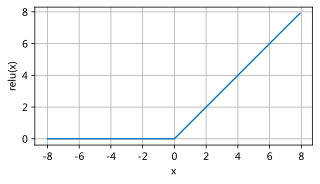

In [18]:
#Relu激活函数（非线性变化）
x=torch.arange(-8,8,0.1,requires_grad=True)
y=torch.relu(x)
# 由于 x 和 y 都是带有梯度信息的 Tensor，如果直接将它们传递给 plot 函数，可能会导致计算图过于庞大，造成不必要的内存占用。
# 为了避免这种情况，我们可以使用 detach() 方法将 x 和 y 的梯度信息从计算图中分离出来，生成新的 Tensor，这样就不会影响之前的自动微分计算。
#因此，x.detach() 和 y.detach() 的作用是将带有梯度信息的 Tensor 分离出来，生成新的 Tensor
# 这样可以避免对之前的自动微分计算造成影响，并且将分离出来的 Tensor 的数值传递给 plot 函数进行可视化。
d2l.plot(x.detach(),y.detach(),'x','relu(x)',figsize=(5,2.5))

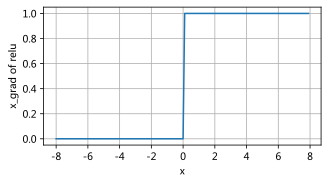

In [21]:
# 绘制relu的导数（梯度，通过自动微分得到）  当输⼊为负时，ReLU函数的导数为0，⽽当输⼊为正时，ReLU函数的导数为1
# 其中 torch.ones_like(x) 表示梯度的初始值为全 1，retain_graph=True 表示保留计算图，以便后续的计算
# x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
# 由于在上面的代码中保留了计算图，因此可以多次调用 backward() 方法来计算不同的梯度信息。
#由于计算图的构建和维护需要耗费一定的计算资源和时间，因此如果每次计算梯度时都重新构建计算图，将会极大地降低计算效率。
#通过设置 retain_graph = True，可以保留计算图，并在计算图上多次进行反向传播，以计算不同的梯度信息，从而提高计算效率。
# 但是在计算完最终的梯度后，需要通过调用 optimizer.zero_grad() 方法来清空梯度信息，以避免之前的梯度信息对后续的训练造成影响。
d2l.plot(x.detach(),x.grad,'x','x_grad of relu',figsize=(5,2.5))

### ReLU函数有许多变体，包括参数化ReLU（Parameterized ReLU，pReLU）函数 
### 该变体为ReLU添加了⼀个线性项，因此即使参数是负的，某些信息仍然可以通过：
### pReLU(x) = max(0, x) + α min(0, x)


# 二、sigmoid 激活函数
### 对于一个定义域在中的输入， sigmoid函数将输入变换为区间(0, 1)上的输出。 因此，sigmoid通常称为挤压函数（squashing function）： 它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：

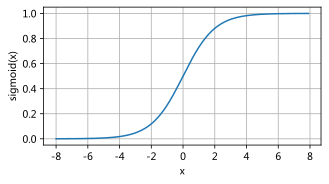

In [22]:
y=torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))


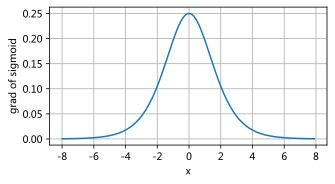

In [23]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of sigmoid',figsize=(5,2.5))

# 三、tanh激活函数
与sigmoid函数类似， tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上。tanh函数关于坐标系原点中心对称

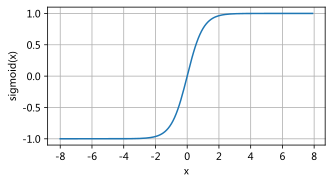

In [24]:
y=torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

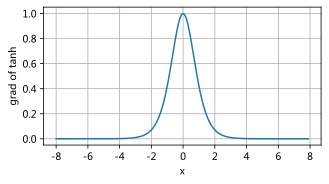

In [25]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of tanh',figsize=(5,2.5))

# 总结
## ReLU激活函数：
1. 通常在神经网络中使用，具有良好的计算性能和收敛速度。
2. 在正区间(x > 0)中导数恒等于1，在负区间(x <= 0)中导数恒等于0，可以避免梯度消失的问题。
3. 但是，ReLu在负区间存在“神经元死亡”问题，即导致该神经元永远不会被激活，这可能会导致网络性能下降。
## Sigmoid激活函数：
1. 通常在神经网络中使用，具有良好的计算性能和收敛速度。
2. 在正区间(x > 0)中导数恒等于1，在负区间(x <= 0)中导数恒等于0，可以避免梯度消失的问题。
3. 但是，ReLu在负区间存在“神经元死亡”问题，即导致该神经元永远不会被激活，这可能会导致网络性能下降。
## Tanh激活函数：
1. 取值范围为(-1,1)，也可视为概率，且输出范围比Sigmoid更广泛。
2. 在输入值为0时函数值为0，在输入值较大或较小时函数的导数会趋向于0，存在梯度消失的问题
3. 可以用于二元或多类分类问题，但在深层网络中也可能存在梯度消失或梯度爆炸的问题。

## 关于导数和梯度消失
当输入值很大或很小时，Sigmoid函数的导数接近于0，这意味着函数在这些位置的变化非常缓慢。在神经网络中，如果使用Sigmoid函数作为激活函数，当输入值过大或过小时，梯度值会变得非常小，这就会导致反向传播算法中的梯度消失问题。梯度消失问题会导致网络无法有效地学习到更深层次的特征表示，从而影响模型的性能。因此，在深度神经网络中，通常不使用Sigmoid函数作为激活函数，而是使用ReLU等其他函数。


## 关于梯度爆炸
梯度爆炸和导数之间的关系可以从反向传播算法的角度来理解。在反向传播算法中，我们需要计算损失函数对于网络参数的梯度，即各个参数的偏导数值。在网络的每一层中，都有一个梯度值向后传播到前一层，这个梯度值通常等于当前层梯度值与当前层输入值的乘积，即梯度值会随着层数的增加而不断放大或缩小。

当梯度值不断放大，超过了计算机可以表示的范围，就会产生梯度爆炸的问题。在这种情况下，梯度值可能变得无穷大或者非常接近无穷大，导致参数更新的幅度非常大，网络参数发生剧烈的变化，甚至无法收敛
梯度爆炸通常出现在网络层数很多时，多次矩阵乘法操作使得梯度值不断增大，超过了计算机可以表示的范围，从而溢出（overflow）或变得非常大。这种情况下，梯度值可能变得无穷大或者非常接近无穷大，使得参数更新的幅度非常大，导致网络参数发生剧烈的变化，甚至无法收敛。

解决梯度爆炸的方法之一是使用梯度剪裁（gradient clipping）技术，即限制梯度值的大小，将梯度值限制在一个固定的范围内，例如通过设置梯度的最大范数（max norm）来控制梯度的大小。这样可以减缓梯度爆炸的影响，防止网络参数发生过大的变化。

## 导数和梯度的关系
0. 在微积分中，导数是指函数在某一点处的变化率或斜率，而梯度则是指多元函数在某一点处的变化率或斜率向量，它由各个偏导数组成。在机器学习中，梯度通常指损失函数对于网络参数的梯度，即反向传播算法中的梯度值。
1. 在神经网络中，梯度通常用于优化网络参数，使得损失函数的值尽可能地小。通过反向传播算法，我们可以计算出网络每个参数的梯度，然后使用梯度下降等优化算法来更新网络参数，使得损失函数逐步减小。

2. 在单变量函数的情况下，导数就是函数的梯度。而在多变量函数的情况下，梯度是一个向量，包含了函数在每个方向上的变化率，而导数只是梯度向量中的一个元素。

3. 在神经网络中，通常使用链式法则来计算损失函数对于每个参数的梯度，即将梯度向量分解为各个参数的偏导数乘积的和。因此，在神经网络中，导数和梯度的概念密切相关，它们都涉及到函数在某个点处的变化率或斜率。